In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from sklearn.linear_model import LinearRegression

In [2]:
plt.rcParams['figure.figsize'] = (15, 10)

In [3]:
housing = pd.read_csv('./data/housing.csv')
housing.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


### Vokabel

* Spalten(`longitude`, `latitude`, ...) -> *Features*
* Zeilen -> *Observations*
* Tabelle -> *DataFrame*

### Explorative Data Analysis

In [26]:
housing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


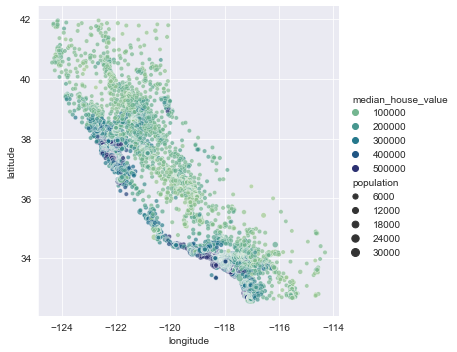

In [27]:
sns.relplot(data=housing,
            x='longitude',
            y='latitude',
            size='population',
            alpha=0.7,
            hue='median_house_value',
            palette='crest')

<AxesSubplot:xlabel='median_house_value', ylabel='Count'>

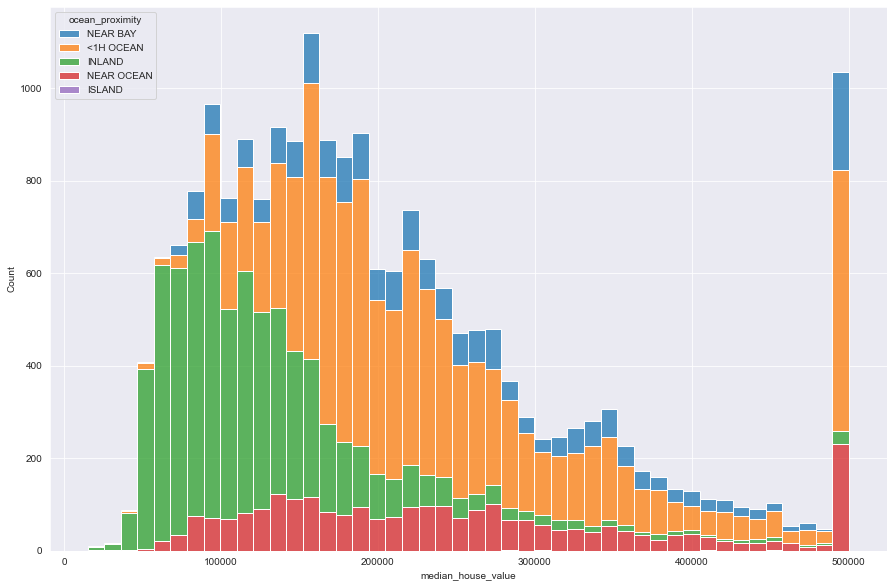

In [28]:
sns.histplot(data=housing, x='median_house_value', hue='ocean_proximity', multiple='stack')

<AxesSubplot:xlabel='median_income', ylabel='Count'>

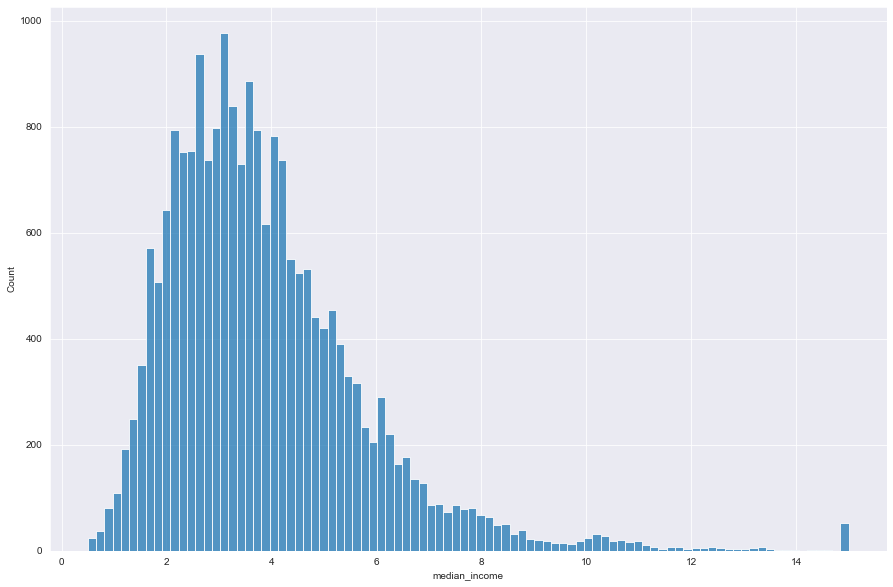

In [29]:
sns.histplot(housing['median_income'])

### Korrelation

Der Korrelationskoeffizient **r** gibt die Stärke des **linearen** Zusammenhangs zwischen 2 features an

![Korrelation](https://upload.wikimedia.org/wikipedia/commons/0/02/Correlation_examples.png)

<AxesSubplot:>

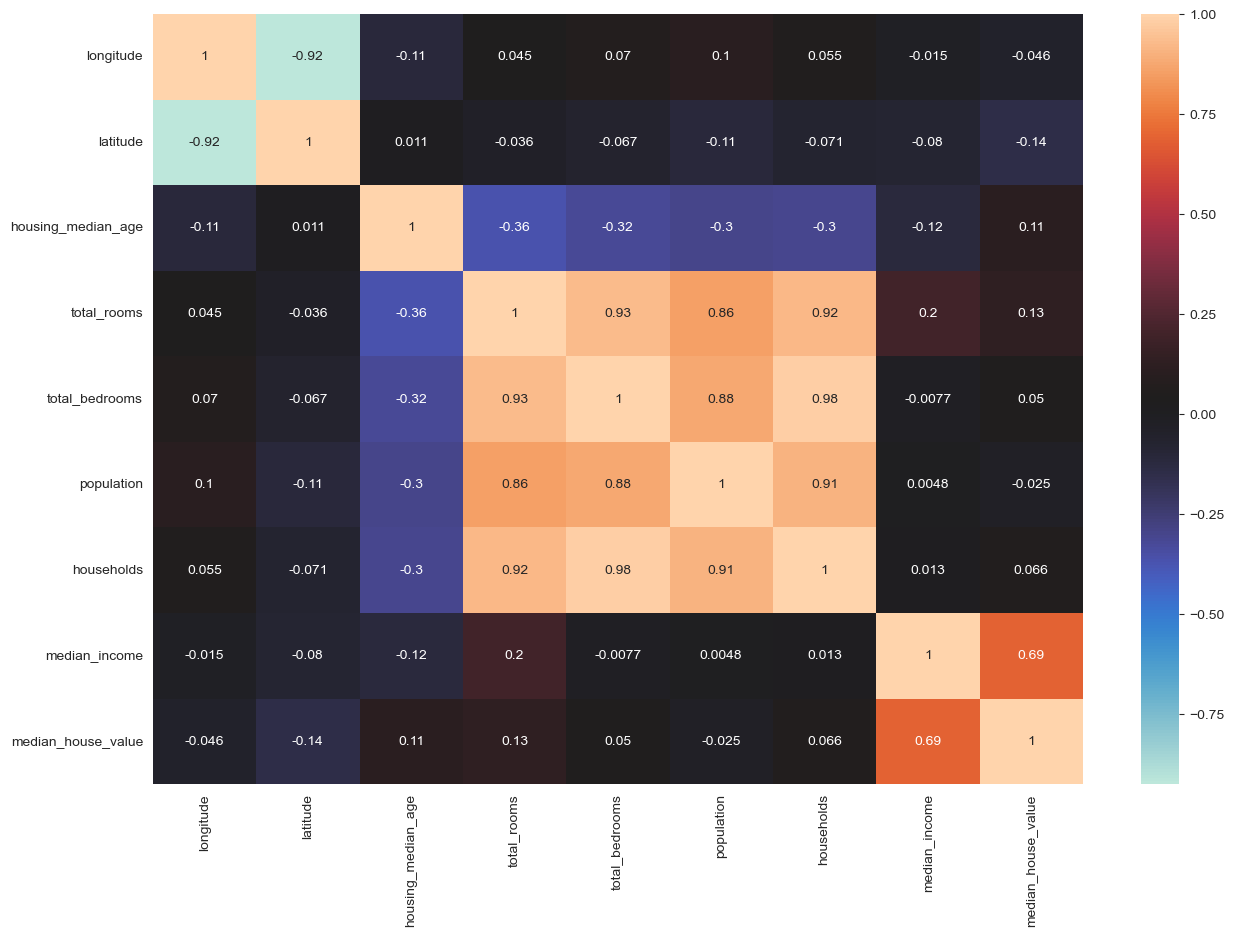

In [12]:
corr = housing.corr()
sns.heatmap(corr, annot=True, cmap='icefire')

### Training

1. model erzeugen
2. model an Trainingsdaten fitten
3. model evaluieren

In [48]:
X = housing[['median_income']]
y = housing.median_house_value

<AxesSubplot:ylabel='median_house_value'>

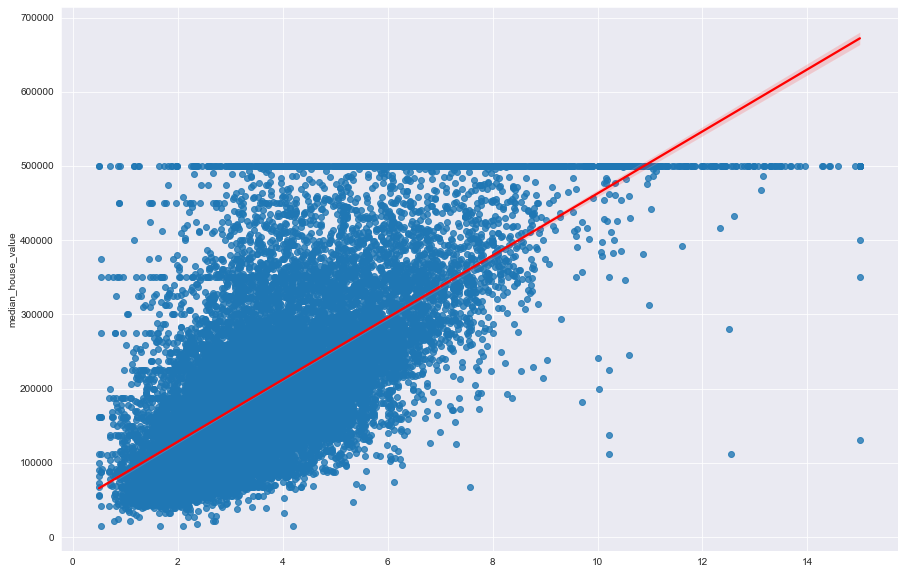

In [37]:
sns.regplot(x=X, y=y, line_kws = {'color': 'red'})

### Linear Regression

Finden einer Gerade, welche den Fehler minimiert
![Fehler](./assets/mse.png)
[gif](http://cdn-images-1.medium.com/max/640/1*eeIvlwkMNG1wSmj3FR6M2g.gif)

In [49]:
model = LinearRegression()
model.fit(X, y)

LinearRegression()

In [52]:
model.predict([[2],[4]])

C:\Users\chris\anaconda3\envs\AI\lib\site-packages\sklearn\base.py:445: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([128673.27510706, 212260.97351085])

### Evaluierung?

Unmöglich, keine Daten -> train_test_split